In [3]:
import sys
sys.path.append('/home/mksoll/DL4WeatherAndClimate')

In [4]:
%load_ext autoreload
%autoreload
from src.eval import evaluate
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import ipywidgets as widgets
from IPython.display import display
%matplotlib widget
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'cartopy'

In [67]:
predicted_labels_xr, labels_xr = evaluate("/Users/ksoll/git/DL4WeatherAndClimate/models/model_best_loss_0.0564_20240406-143532.pth")

INFO:src.eval:Creating Model
INFO:src.fuxi:Creating FuXi Model
INFO:src.fuxi:Creating SpaceTimeCubeEmbedding layer
INFO:src.fuxi:Creating UTransformer Layer
INFO:src.fuxi:Creating DownBlock Layer
INFO:src.fuxi:Creating UpBlock Layer
INFO:src.eval:Load Model successfully
INFO:src.eval:Creating Eval Dataset
INFO:src.eval:Creating DataLoader
Initialisierung:  67%|██████▋   | 6/9 [00:04<00:02,  1.49it/s]


RMSE: tensor([0.7401, 0.6687, 0.6481, 0.4899, 0.2274, 0.2492, 0.1687, 0.1236, 0.0566,
        0.0443, 0.3918, 0.4003, 0.4037, 0.4284, 0.4830, 0.5633, 0.5639, 0.5605,
        0.5597, 0.5636, 0.0743, 0.1899, 0.2878, 0.5736, 1.0071])
ACC: tensor([ 1.2973e-04, -5.4149e-04, -7.4378e-05, -1.6811e-04,  6.5716e-05,
        -2.6095e-04, -1.8628e-04,  5.2682e-05, -6.6655e-05,  5.6391e-05,
        -1.7067e-04, -1.3958e-04, -1.0367e-04, -1.7900e-04, -1.1751e-04,
        -7.1434e-05,  3.9704e-05,  9.4690e-05, -3.6098e-05, -5.4023e-05,
        -4.5836e-04, -2.5783e-04, -2.7872e-05, -3.8216e-04, -5.6578e-04])
MAE: tensor([0.3394, 0.3057, 0.2985, 0.2276, 0.1127, 0.1719, 0.1266, 0.0960, 0.0442,
        0.0338, 0.1889, 0.1911, 0.1901, 0.1990, 0.2358, 0.2718, 0.2702, 0.2671,
        0.2659, 0.2719, 0.0477, 0.0976, 0.1435, 0.2696, 0.4635])


In [3]:
data_to_plot = labels_xr.sel(time=1, variables=1)

original_lat_range = [0, data_to_plot.lat.max().values]
original_lon_range = [0, data_to_plot.lon.max().values]

# Zielbereiche für Skalierung
scaled_lat_range = [-90, 90]  # Zielbereich für Latituden
scaled_lon_range = [-180, 180]  # Zielbereich für Longituden

# Funktion zur Skalierung der Koordinaten
def scale_coords(original_coords, original_range, target_range):
    scale_factor = (target_range[1] - target_range[0]) / (original_range[1] - original_range[0])
    scaled_coords = original_coords * scale_factor + target_range[0]
    return scaled_coords

# Skaliere die Koordinaten
scaled_lats = scale_coords(np.array(data_to_plot.lat), original_lat_range, scaled_lat_range)
scaled_lons = scale_coords(np.array(data_to_plot.lon), original_lon_range, scaled_lon_range)

# Nun kannst du die skalierten Koordinaten für das Plotten verwenden
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

cf = ax.contourf(scaled_lons, scaled_lats, data_to_plot,
                 transform=ccrs.PlateCarree(), cmap='viridis')

plt.colorbar(cf, ax=ax, shrink=0.5, label='Variable 1 Werte')
plt.title('Vorhergesagte Labels für Zeitpunkt 1, Variable 1')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>

<Figure size 1000x500 with 2 Axes>

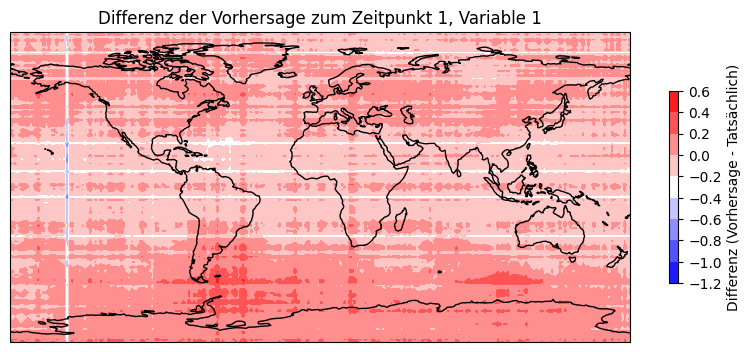

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

predicted_data = predicted_labels_xr.sel(time=1, variables=1)
actual_data = labels_xr.sel(time=1, variables=1)
data_difference = predicted_data - actual_data

# Setze die Originalbereiche basierend auf den Maximalwerten der Differenzdaten
original_lat_range = [0, data_difference.lat.max().values]
original_lon_range = [0, data_difference.lon.max().values]

# Zielbereiche für Skalierung
scaled_lat_range = [-90, 90]  # Zielbereich für Latituden
scaled_lon_range = [-180, 180]  # Zielbereich für Longituden

# Funktion zur Skalierung der Koordinaten
def scale_coords(original_coords, original_range, target_range):
    scale_factor = (target_range[1] - target_range[0]) / (original_range[1] - original_range[0])
    scaled_coords = original_coords * scale_factor + target_range[0]
    return scaled_coords

# Skaliere die Koordinaten
scaled_lats = scale_coords(np.array(data_difference.lat), original_lat_range, scaled_lat_range)
scaled_lons = scale_coords(np.array(data_difference.lon), original_lon_range, scaled_lon_range)

# Erstelle die Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

# Da data_difference ein xr.DataArray ist, konvertiere es zu NumPy für das Plotten
difference_array = data_difference.values
cf = ax.contourf(scaled_lons, scaled_lats, difference_array,
                 transform=ccrs.PlateCarree(), cmap='bwr')

plt.colorbar(cf, ax=ax, shrink=0.5, label='Differenz (Vorhersage - Tatsächlich)')
plt.title('Differenz der Vorhersage zum Zeitpunkt 1, Variable 1')
plt.show()


In [5]:
import ipywidgets as widgets
from IPython.display import display

# Annahme: predicted_labels_xr und labels_xr sind bereits definierte xarray DataArrays

# Funktion zur Berechnung der Differenz
def calculate_difference(time_point):
    predicted_data = predicted_labels_xr.sel(time=time_point, variables=1)
    actual_data = labels_xr.sel(time=time_point, variables=1)
    return predicted_data - actual_data

# Funktion zur Aktualisierung des Plots
def update_plot(time_idx):
    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Berechne die Differenz für den ausgewählten Zeitpunkt
    time_point = predicted_labels_xr.time.values[time_idx]
    data_difference = calculate_difference(time_point)
    
    # Skaliere die Koordinaten (wie zuvor definiert)
    scaled_lats = scale_coords(np.array(data_difference.lat), original_lat_range, scaled_lat_range)
    scaled_lons = scale_coords(np.array(data_difference.lon), original_lon_range, scaled_lon_range)
    
    difference_array = data_difference.values
    cf = ax.contourf(scaled_lons, scaled_lats, difference_array, transform=ccrs.PlateCarree(), cmap='bwr')
    plt.colorbar(cf, ax=ax, shrink=0.5, label='Differenz (Vorhersage - Tatsächlich)')
    plt.title('Differenz der Vorhersage zum ausgewählten Zeitpunkt, Variable 1')
    plt.show()

# Erstelle einen Slider Widget
time_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(predicted_labels_xr.time.values)-1,
    step=1,
    description='Zeitpunkt:',
    continuous_update=False
)

# Widget, das bei jeder Änderung des Sliders die update_plot Funktion aufruft
widgets.interactive(update_plot, time_idx=time_slider)


interactive(children=(IntSlider(value=0, continuous_update=False, description='Zeitpunkt:', max=113), Output()…